In [1]:
import requests

In [2]:
from bs4 import BeautifulSoup

In [3]:
#웹크롤링을 할 주소
response = requests.get("http://www.naver.com")

In [4]:
response

<Response [200]>


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
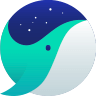
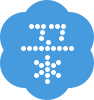

In [5]:
#텍스트만 불러와서 변수 html에 담음
html = response.text
print(html)


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
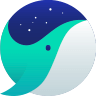
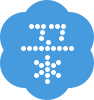

In [6]:
#html.parser (html번역기로 이해)이용해 가공
soup = BeautifulSoup(html,'html.parser')
soup

In [7]:
#select_one('태그이름')은 하나만 추출
#select를 쓰면 여러개를 추출 
word = soup.select_one('#NM_set_home_btn')
print(word.text)

네이버를 시작페이지로


In [8]:
#atts[''] 원하는 속성의 값만 추출 
print(word.attrs['href'])

https://help.naver.com/support/welcomePage/guide.help


In [9]:
print(word.attrs['class'])

['link_set']


In [10]:
print(word.attrs['data-clk'])

top.mkhome


In [11]:
#클래스명 title_area  >(자손) 클래스명 title
word2=soup.select_one('.title_area>.title')
word2

<strong class="title">오늘 읽을만한 글</strong>

In [12]:
word2.text

'오늘 읽을만한 글'

In [13]:
word3 = soup.select('strong.title') #결과가 리스트형식으로 출력 
word4 = soup.select_one('strong.title')

In [14]:
word3

[<strong class="title">오늘 읽을만한 글</strong>,
 <strong class="title">박진영 모닝루틴  20년째 실천 중인 시크릿 건강 식단  아침식사  집사부일체 60회 61회</strong>,
 <strong class="title">테라조느낌 지점토 트레이 만들기 - 인테리어소품 DIY</strong>,
 <strong class="title">창고형가구할인매장 리퍼브 싸게</strong>,
 <strong class="title">PGA 투어 탑 100 선수 순위</strong>,
 <strong class="title">셀프 반지 호수(사이즈) 재는법 (남자, 여자 반지 호수 표)</strong>,
 <strong class="title">계란찜 만들기 부드러운 치즈 전자레인지 계란찜 뚝배기로 전자렌지 가능</strong>,
 <strong class="title">변비에는 어떤 약을 복용하나요?</strong>,
 <strong class="title">월별 건강 수칙으로 새해를 더욱 건강하게!</strong>,
 <strong class="title">나이에 한번! 직업에 두 번 놀라운 자기소개?! ㅣ나는솔로 EP.26ㅣSBSPLUSㅣ매주 수요일 밤 10시 30분 방송</strong>,
 <strong class="title">제라늄 꽃 : 예거서스 모르모르마르타</strong>,
 <strong class="title">[메카실험실] 리그오브레전드 – 베인이 아지르 벽에 머리 쿵해쪄</strong>,
 <strong class="title">20대 초반(03~98년생) 정신 차려야 하는 이유</strong>,
 <strong class="title">제네시스 G90 풀체인지 실물 목격, 출시정보 정리 RS4</strong>,
 <strong class="title">태국 한달살기, 치앙마이 여행 올드타운 Graph 카페</strong>,
 <strong class="title">"이래서 선택합니다" 그랜저에 245

In [15]:
word4

<strong class="title">오늘 읽을만한 글</strong>

In [16]:
#for 변수 in 배열:  (배열의 값을 하나씩 변수에 대입)
for i in word3:
    print(i.text)

오늘 읽을만한 글
박진영 모닝루틴  20년째 실천 중인 시크릿 건강 식단  아침식사  집사부일체 60회 61회
테라조느낌 지점토 트레이 만들기 - 인테리어소품 DIY
창고형가구할인매장 리퍼브 싸게
PGA 투어 탑 100 선수 순위
셀프 반지 호수(사이즈) 재는법 (남자, 여자 반지 호수 표)
계란찜 만들기 부드러운 치즈 전자레인지 계란찜 뚝배기로 전자렌지 가능
변비에는 어떤 약을 복용하나요?
월별 건강 수칙으로 새해를 더욱 건강하게!
나이에 한번! 직업에 두 번 놀라운 자기소개?! ㅣ나는솔로 EP.26ㅣSBSPLUSㅣ매주 수요일 밤 10시 30분 방송
제라늄 꽃 : 예거서스 모르모르마르타
[메카실험실] 리그오브레전드 – 베인이 아지르 벽에 머리 쿵해쪄
20대 초반(03~98년생) 정신 차려야 하는 이유
제네시스 G90 풀체인지 실물 목격, 출시정보 정리 RS4
태국 한달살기, 치앙마이 여행 올드타운 Graph 카페
"이래서 선택합니다" 그랜저에 245만 원을 추가해야 하는 이유
윗배, 아랫배 체지방 빼는 여자 복근운동 루틴
박신혜 최태준 새해 1월 교회 결혼식  이 둘처럼 경건한 채플st 인기웨딩홀 찾고 있다면?
[의심 엔딩] 그 종이비행기 왜 가지고 있어? | JTBC 220102 방송
현대차가 알뜰폰 사업하는 이유
2021 자라 세일 오프라인 쇼핑 후기 및 품목 추천 리뷰
“형이 거기서 왜 나와…?” 김정은도 반해버린 프리미엄 SUV, 렉서스 LX
도시락반찬 겸 일주일 밑반찬 만들기
코스트코 빵 종류 다 찍어왔드아~
소소한 여행 썰] 내가 탄 비행기의 승무원이 모두 연예인?? (feat. 비행기 타고 가요)
이모의 생일 선물 보석 십자수, 한달 만에 완성!!
"무조건 벌금 12만원입니다" 이건 너무한거 아니냐는 시민들의 말에 내세운 대책은?
선수, 코치들이 인정한 김종국 감독!｜‘서재응 코치’ 인터뷰 1편｜이영미의 셀픽쇼
SK의 길을 가는 한화
20개월 해외여행 못 가면서 사라진 습관들
나의 아저씨 명대사 아이유 이선균 엔딩 결말 #3
테라스가 있는 반지하

In [17]:
#제목과 주소를 추출
response2 = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%82%BC%EC%84%B1")
response2

<Response [200]>

<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="삼성 : 네이버 뉴스검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'삼성'의 네이버 뉴스검색 결과입니다."> <meta name="description" lang="ko" content="'삼성'의 네이버 뉴스검색 결과입니다."> <title>삼성 : 네이버 뉴스검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_211216.css"> <link rel="stylesheet" type="text/css" href="https:/
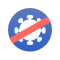
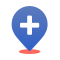
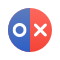
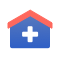

In [18]:
html2 = response2.text
print(html2)

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="삼성 : 네이버 뉴스검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'삼성'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'삼성'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>삼성 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_211216.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic/sea
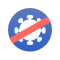
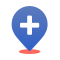
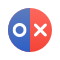
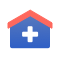

In [19]:
soup2 = BeautifulSoup(html2,'html.parser') #가공
soup2

In [20]:
wordSamsung = soup2.select('.news_tit')
wordSamsung

[<a class="news_tit" href="http://yna.kr/AKR20220107035700003?did=1195m" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=880000D8_000000000000000012903342&amp;g=001.0012903342&amp;u='+urlencode(this.href));" target="_blank" title="삼성전자 작년 연간 매출 279조원…사상 최대치 기록(종합)"><mark>삼성</mark>전자 작년 연간 매출 279조원…사상 최대치 기록(종합)</a>,
 <a class="news_tit" href="http://news.mk.co.kr/newsRead.php?no=19330&amp;year=2022" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=4&amp;i=880000BC_000000000000000004905661&amp;g=009.0004905661&amp;u='+urlencode(this.href));" target="_blank" title="삼성전자 장중 1% 강세…연매출 279조, 역대 최대 매출 달성"><mark>삼성</mark>전자 장중 1% 강세…연매출 279조, 역대 최대 매출 달성</a>,
 <a class="news_tit" href="https://www.hani.co.kr/arti/economy/economy_general/1026389.html" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=9&amp;i=88000103_000000000000000002574650&amp;g=028.0002574650&amp;u='+urlencode(this.href));" target="_blank" title="삼성전자 작년 연간 매출 279조원…사상 최대 기록"><mark>삼성</mark>전자 작년 연간 매출 279조원…사

In [21]:
for i in wordSamsung:
    print(i.attrs['title'])
    print(i.attrs['href'])

삼성전자 작년 연간 매출 279조원…사상 최대치 기록(종합)
http://yna.kr/AKR20220107035700003?did=1195m
삼성전자 장중 1% 강세…연매출 279조, 역대 최대 매출 달성
http://news.mk.co.kr/newsRead.php?no=19330&year=2022
삼성전자 작년 연간 매출 279조원…사상 최대 기록
https://www.hani.co.kr/arti/economy/economy_general/1026389.html
삼성전자, LGD와 동맹 가능성 첫 언급…한종희 부회장 “OLED 구매, 열려있다”
https://www.khan.co.kr/economy/business/article/202201062157015
삼성전자, 작년 4분기 매출 76조·영업익 13.8조
http://www.newsis.com/view/?id=NISX20220107_0001716245&cID=13001&pID=13000
OLED TV 초고화질 전쟁 점화… 삼성 QD vs LG EX
https://biz.chosun.com/it-science/ict/2022/01/07/TQTK2SLTYFGGDLSWR3KTHBAUVE/?utm_source=naver&utm_medium=original&utm_campaign=biz
삼성전자, 작년 매출 279조원...역대 최대
https://zdnet.co.kr/view/?no=20220107091616
삼성전자, 4분기 매출 76조 영업이익 13.8조
http://www.joseilbo.com/news/news_read.php?uid=443151&class=17&grp=
삼성·현대차·LG의 ‘초협력’… 국내 대표 기업 간 동맹 강화 기대감
https://www.seoul.co.kr/news/newsView.php?id=20220107023008&wlog_tag3=naver
한종희 "삼성 TV 16년 연속 1위 했지만…도약 필요한 시점" [CES 2022]
https://www.hankyung.com/it/

## 검색어에 따라 다른 결과 나타내기
### 프로토콜, 도메인, 패스(경로), 파라미터(서버의 추가적인 정보를 제공하기 위해서 사용, 키와 값으로 구성, &로 구분)
### query는 검색어에 해당됨
### 파이썬에서 사용자에게 검색어를 입력받은 뒤 query값에 적용하면 검색어 변경 가능

In [22]:
keyword = input("insert keyword, 검색어를 입력하세요.")

#삼성전자 뉴스의  url으로부터 응답요청
#url한글은 인코딩되어 표시
#query 값으로 사용자로부터 입력받은 keyword가 대입되도록 함 
response3 = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query="+keyword)

#웹 사이트의 html소스 코드 가져옴 
html3 = response3.text

#html 텍스트를 가져오기 쉽게 soup를 적용 
#html_parser(html번역기로 해석)
soup3 = BeautifulSoup(html3,'html.parser')

#select는 여러개의 태그를 가져옴, select_one으로 원하는 태그 하나만 가져옴
#select로 뉴스 기사 10개를 다 가져옴
#soup.select_one('.news_fit')
links3 = soup3.select('.news_tit') #결과가 리스트 형태로 나옴

#리스트의 값을 하나씩 for 문으로 출력 
for link in links3:
    title = link.text #태그 내 텍스트 요소 가져옴
    url = link.attrs['href'] #속성 href의 값을 가져옴 
    print(title, url)


insert keyword, 검색어를 입력하세요.카카오
카카오T 블루, 취소수수료 배분 개편…기사가 30% http://www.newsis.com/view/?id=NISX20220107_0001716471&cID=13001&pID=13000
"내 돈 날렸다"···카카오, '10만원 붕괴 위험' 목표가 15% 하향 https://www.sedaily.com/NewsView/260RTY0YVU
카카오엔터, 인기 웹툰 ‘나혼렙’ NFT 발행 https://biz.chosun.com/it-science/ict/2022/01/07/HQ65YCRGRZER5LTDY6BXLQ5D5U/?utm_source=naver&utm_medium=original&utm_campaign=biz
[게시판] 카뱅 '26주적금 with 카카오페이지' 2주간 60만좌 개설 http://yna.kr/AKR20220106106500002?did=1195m
‘카카오T 블루’ 호출 취소 수수료 기사도 일부 받도록 개편 https://news.kbs.co.kr/news/view.do?ncd=5367155&ref=A
카카오메이커스, 금산 인삼 농가 돕기 나선다 http://www.edaily.co.kr/news/newspath.asp?newsid=01423526632195424
'카카오, 모멘텀 확보까지 긴 호흡 접근이 현실적…목표가↓"-이베스트 https://www.hankyung.com/finance/article/2022010720756
[단독] 카카오, 물류 비즈니스 공략 본격화… '카카오i 라스' 출범 http://www.inews24.com/view/1440611
카카오 주가 오늘 10만원 붕괴되나, 카카오 산 동학개미 발 동동 http://www.fnnews.com/news/202201070654439860
카카오 주주들 “1100억 먹튀 CEO, 국민연금이 막아달라” https://www.chosun.com/economy/money/2022/01/07/XL2TENFHQBB57FFS5WG62Z